In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Understanding the data
dataset=pd.read_csv('AddedFeatures_campaign_sale.csv')
# first 10 data from dataset
dataset.head(10)

,Index,Campaign Period Sales,Buy,Historical Sales Volume,Number of Prior Year Transactions,Number of Transactions,Purchase Breadth,Customer_engagement_days,Days_since_last_transaction,Customer_engagement_length,...,Email Available,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies
0,0,238.704762,1,1.468034e+05,15,15,2,19170,2242,Long-term,...,True,False,False,False,False,False,False,True,False,True
1,1,281.680000,1,4.399842e+05,22,22,1,14530,2368,Long-term,...,True,False,False,False,False,False,False,False,False,True
2,2,432.857143,1,9.704657e+05,19,19,1,21331,4028,Long-term,...,True,False,False,False,False,False,False,False,False,True
3,3,0.000000,0,2.301936e+05,17,17,1,13814,2417,Mid-term,...,True,False,False,False,False,False,False,False,False,True
4,4,308.419048,1,1.825841e+05,16,16,2,15292,3137,Long-term,...,False,False,False,False,False,False,False,False,True,True
5,5,0.000000,0,1.512525e+05,6,6,0,12551,2893,Mid-term,...,True,False,False,False,False,False,False,False,False,False
6,6,0.000000,0,1.377761e+06,21,21,1,12991,2779,Mid-term,...,False,False,False,False,False,False,False,False,False,True
7,7,223.440000,1,2.775125e+05,18,18,1,14149,3214,Mid-term,...,False,False,False,False,False,False,False,False,False,True
8,8,0.000000,0,2.214571e+05,15,15,1,13631,2077,Mid-term,...,True,False,False,False,False,False,False,False,False,True
9,9,124.760000,1,1.993665e+05,17,17,1,14817,2204,Long-term,...,True,False,False,False,False,False,False,False,False,True


In [21]:
dataset['Language_group'].unique()

array(['English', 'Unknown', 'Asian', 'European'], dtype=object)

In [25]:
dataset['Repurchase Method'].unique()

array(['AUTO RENEW', 'NOTICE'], dtype=object)

In [27]:
dataset['Last Transaction Channel'].unique()

array(['AUTO RENEW', 'MAIL', 'PHONE', 'WEB', 'BRANCH (POS)',
       'BRANCH (PHONE)', 'IT', 'BILLING'], dtype=object)

In [29]:
dataset['Number of Employees'].unique()

array(['6-10', '11-50', '1-5', '51-100', '101-500', '500+'], dtype=object)

In [30]:
dataset['Service Level'].unique()

array(['Premier', 'Standard'], dtype=object)

In [33]:
dataset['Do No Disturb'].unique()

array([False,  True])

In [4]:
dataset.columns

Index(['Index', 'Campaign Period Sales', 'Buy', 'Historical Sales Volume',
       'Number of Prior Year Transactions', 'Number of Transactions',
       'Purchase Breadth', 'Customer_engagement_days',
       'Days_since_last_transaction', 'Customer_engagement_length',
       'Language_group', 'Repurchase Method', 'Last Transaction Channel',
       'Number of Employees', 'Service Level', 'Do No Disturb',
       'Email Available', 'Desk', 'Executive Chair', 'Standard Chair',
       'Monitor', 'Printer', 'Computer', 'Insurance', 'Toner',
       'Office Supplies'],
      dtype='object')

In [5]:
dataset.describe()

,Index,Campaign Period Sales,Buy,Historical Sales Volume,Number of Prior Year Transactions,Number of Transactions,Purchase Breadth,Customer_engagement_days,Days_since_last_transaction
count,12132.000000,12132.000000,12132.000000,1.213200e+04,12132.000000,12132.000000,12132.000000,12132.000000,12132.000000
mean,6065.500000,107.933384,0.270936,5.600768e+05,16.512117,16.500412,1.255358,10297.605589,3009.300363
std,3502.351067,267.200455,0.444462,7.039575e+05,6.034094,6.040510,0.751494,3969.253480,794.941745
min,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,1033.000000,934.000000
25%,3032.750000,0.000000,0.000000,1.792572e+05,13.000000,13.000000,1.000000,8670.000000,2431.000000
50%,6065.500000,0.000000,0.000000,3.678030e+05,18.000000,18.000000,1.000000,10055.000000,2925.000000
75%,9098.250000,137.278000,1.000000,6.921952e+05,20.000000,20.000000,1.000000,12323.000000,3436.000000
max,12131.000000,5927.306667,1.000000,1.648348e+07,64.000000,64.000000,9.000000,34770.000000,6827.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Index                              12132 non-null  int64  
 1   Campaign Period Sales              12132 non-null  float64
 2   Buy                                12132 non-null  int64  
 3   Historical Sales Volume            12132 non-null  float64
 4   Number of Prior Year Transactions  12132 non-null  int64  
 5   Number of Transactions             12132 non-null  int64  
 6   Purchase Breadth                   12132 non-null  int64  
 7   Customer_engagement_days           12132 non-null  int64  
 8   Days_since_last_transaction        12132 non-null  int64  
 9   Customer_engagement_length         12132 non-null  object 
 10  Language_group                     12132 non-null  object 
 11  Repurchase Method                  12132 non-null  obj

In [7]:
dataset.shape

(12132, 26)

In [61]:
dataset.isna().sum()

Index                                0
Campaign Period Sales                0
Buy                                  0
Historical Sales Volume              0
Number of Prior Year Transactions    0
Number of Transactions               0
Purchase Breadth                     0
Customer_engagement_days             0
Days_since_last_transaction          0
Customer_engagement_length           0
Language_group                       0
Repurchase Method                    0
Last Transaction Channel             0
Number of Employees                  0
Service Level                        0
Do No Disturb                        0
Email Available                      0
Desk                                 0
Executive Chair                      0
Standard Chair                       0
Monitor                              0
Printer                              0
Computer                             0
Insurance                            0
Toner                                0
Office Supplies          

In [10]:
dataset['Number of Transactions'].unique()

array([15, 22, 19, 17, 16,  6, 21, 18, 10, 23, 30,  8, 11,  4,  3, 20, 14,
        1, 12,  5, 24, 13,  9,  7,  2, 48, 25, 54, 32, 44, 29, 26, 33, 28,
       34, 47, 57, 27, 58, 41, 37, 35, 45, 51, 50, 49, 31, 39, 55, 38, 42,
       36, 40, 43, 53, 59, 64, 60, 61])

# Filtering Rows

dataset['Email Available']

In [11]:
email_available_dataset=dataset[dataset['Email Available']==True]
email_available_dataset

,Index,Campaign Period Sales,Buy,Historical Sales Volume,Number of Prior Year Transactions,Number of Transactions,Purchase Breadth,Customer_engagement_days,Days_since_last_transaction,Customer_engagement_length,...,Email Available,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies
0,0,238.704762,1,146803.428571,15,15,2,19170,2242,Long-term,...,True,False,False,False,False,False,False,True,False,True
1,1,281.680000,1,439984.160000,22,22,1,14530,2368,Long-term,...,True,False,False,False,False,False,False,False,False,True
2,2,432.857143,1,970465.714286,19,19,1,21331,4028,Long-term,...,True,False,False,False,False,False,False,False,False,True
3,3,0.000000,0,230193.600000,17,17,1,13814,2417,Mid-term,...,True,False,False,False,False,False,False,False,False,True
5,5,0.000000,0,151252.500000,6,6,0,12551,2893,Mid-term,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12126,12126,0.000000,0,937681.920000,24,24,1,5465,3558,Short-term,...,True,False,False,False,False,False,False,False,False,True
12127,12127,0.000000,0,32328.400000,6,6,1,8778,2624,Mid-term,...,True,False,False,False,False,False,False,False,False,True
12129,12129,0.000000,0,71762.880000,21,21,2,8608,2384,Mid-term,...,True,False,False,False,False,False,False,True,False,True
12130,12130,0.000000,0,265963.062857,18,18,1,10725,2107,Mid-term,...,True,False,False,False,False,False,False,False,False,True


In [12]:
email_available_dataset['Email Available'].unique()

array([ True])

# Selecting columns

In [34]:
data_with_selected_columns=dataset[['Number of Transactions','Service Level','Last Transaction Channel']]
data_with_selected_columns

,Number of Transactions,Service Level,Last Transaction Channel
0,15,Premier,AUTO RENEW
1,22,Premier,MAIL
2,19,Premier,MAIL
3,17,Standard,PHONE
4,16,Premier,MAIL
...,...,...,...
12127,6,Premier,WEB
12128,26,Premier,MAIL
12129,21,Standard,WEB
12130,18,Premier,AUTO RENEW


# Sort the dataframe

In [14]:
sorted_data=data_with_selected_columns.sort_values(by=['Number of Transactions'])
sorted_data

,Number of Transactions,Service Level
5133,1,Premier
208,1,Premier
6485,1,Standard
8375,1,Standard
3329,1,Standard
...,...,...
678,58,Premier
8945,59,Premier
11897,60,Standard
12023,61,Premier


 # Dealing with categorical values

In [15]:
catergorical_dataset=dataset.copy()
catergorical_dataset['Email Available'].unique()

array([ True, False])

In [36]:
pd.get_dummies(catergorical_dataset,columns=['Email Available'])

,Index,Campaign Period Sales,Buy,Historical Sales Volume,Number of Prior Year Transactions,Number of Transactions,Purchase Breadth,Customer_engagement_days,Days_since_last_transaction,Customer_engagement_length,...,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Email Available_False,Email Available_True
0,0,238.704762,1,146803.428571,15,15,2,19170,2242,Long-term,...,False,False,False,False,False,True,False,True,0,1
1,1,281.680000,1,439984.160000,22,22,1,14530,2368,Long-term,...,False,False,False,False,False,False,False,True,0,1
2,2,432.857143,1,970465.714286,19,19,1,21331,4028,Long-term,...,False,False,False,False,False,False,False,True,0,1
3,3,0.000000,0,230193.600000,17,17,1,13814,2417,Mid-term,...,False,False,False,False,False,False,False,True,0,1
4,4,308.419048,1,182584.076190,16,16,2,15292,3137,Long-term,...,False,False,False,False,False,False,True,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12127,12127,0.000000,0,32328.400000,6,6,1,8778,2624,Mid-term,...,False,False,False,False,False,False,False,True,0,1
12128,12128,0.000000,0,920240.533333,26,26,0,8717,3515,Mid-term,...,False,False,False,False,False,False,False,False,1,0
12129,12129,0.000000,0,71762.880000,21,21,2,8608,2384,Mid-term,...,False,False,False,False,False,True,False,True,0,1
12130,12130,0.000000,0,265963.062857,18,18,1,10725,2107,Mid-term,...,False,False,False,False,False,False,False,True,0,1


In [62]:
categ =catergorical_dataset[['Repurchase Method','Service Level']]
#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
#creating an object of LabelEncoder
label_en=LabelEncoder()
#label encoding service level and Repurchase Method columns
categ=categ.apply(label_en.fit_transform)
categ

,Repurchase Method,Service Level
0,0,0
1,1,0
2,1,0
3,1,1
4,1,0
...,...,...
12127,0,0
12128,1,0
12129,1,1
12130,0,0


# checking correlation between each columns and rows

In [64]:
correlation=dataset.corr()
correlation

,Index,Campaign Period Sales,Buy,Historical Sales Volume,Number of Prior Year Transactions,Number of Transactions,Purchase Breadth,Customer_engagement_days,Days_since_last_transaction,Do No Disturb,Email Available,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies
Index,1.000000,0.001261,-0.013117,-0.004947,0.002379,0.002455,-0.001689,-0.022896,0.019369,0.011942,-0.000032,0.008793,-0.001691,-0.005801,-0.007097,0.000913,-0.010532,-0.005963,0.002013,0.001696
Campaign Period Sales,0.001261,1.000000,0.662652,0.244359,0.009634,-0.000169,0.200286,0.122734,0.112299,-0.001545,-0.012645,0.062215,0.099184,0.212095,0.281440,0.165123,0.248611,0.058719,0.067126,-0.035076
Buy,-0.013117,0.662652,1.000000,-0.037849,0.012715,0.010751,0.073704,0.287892,-0.089226,0.002103,-0.028373,0.003145,0.042213,0.087200,0.093296,0.068652,0.072192,0.001880,0.036936,0.012767
Historical Sales Volume,-0.004947,0.244359,-0.037849,1.000000,0.290526,0.290253,0.162203,-0.061855,0.306673,-0.020327,-0.007599,0.047108,0.104843,0.131029,0.169871,0.079963,0.160732,0.070638,0.047073,0.004467
Number of Prior Year Transactions,0.002379,0.009634,0.012715,0.290526,1.000000,0.994900,0.131569,0.026211,-0.004711,-0.059735,-0.015881,0.015882,0.033930,0.034101,0.053881,0.024400,0.038653,0.026530,0.057766,0.195890
Number of Transactions,0.002455,-0.000169,0.010751,0.290253,0.994900,1.000000,0.129472,0.026189,-0.005682,-0.059548,-0.015210,0.016319,0.031436,0.034246,0.049092,0.021672,0.036546,0.026592,0.057368,0.195880
Purchase Breadth,-0.001689,0.200286,0.073704,0.162203,0.131569,0.129472,1.000000,0.070417,0.023996,-0.030458,0.075762,0.422340,0.483102,0.428896,0.472146,0.421555,0.470511,0.527042,0.431203,0.370858
Customer_engagement_days,-0.022896,0.122734,0.287892,-0.061855,0.026211,0.026189,0.070417,1.000000,-0.128927,-0.067389,-0.026635,-0.018678,0.095251,0.025322,0.014269,0.024032,0.009514,0.000119,0.044090,0.057182
Days_since_last_transaction,0.019369,0.112299,-0.089226,0.306673,-0.004711,-0.005682,0.023996,-0.128927,1.000000,-0.011299,0.009320,0.016573,-0.007887,0.019694,0.035089,0.015426,0.031469,0.020472,-0.006891,0.008321
Do No Disturb,0.011942,-0.001545,0.002103,-0.020327,-0.059735,-0.059548,-0.030458,-0.067389,-0.011299,1.000000,-0.046106,-0.005923,-0.031269,0.007975,0.000133,-0.007281,-0.008092,0.004356,-0.016732,-0.039419


# Visualizing the data

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Index                              12132 non-null  int64  
 1   Campaign Period Sales              12132 non-null  float64
 2   Buy                                12132 non-null  int64  
 3   Historical Sales Volume            12132 non-null  float64
 4   Number of Prior Year Transactions  12132 non-null  int64  
 5   Number of Transactions             12132 non-null  int64  
 6   Purchase Breadth                   12132 non-null  int64  
 7   Customer_engagement_days           12132 non-null  int64  
 8   Days_since_last_transaction        12132 non-null  int64  
 9   Customer_engagement_length         12132 non-null  object 
 10  Language_group                     12132 non-null  object 
 11  Repurchase Method                  12132 non-null  obj

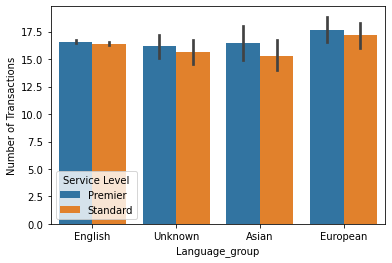

In [70]:
import seaborn as sb
sb.barplot(x='Language_group',y='Number of Transactions',hue='Service Level',data=dataset)
plt.show()

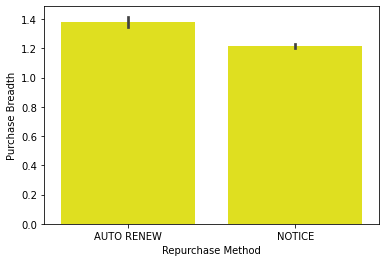

In [73]:
sb.barplot(x='Repurchase Method',y='Purchase Breadth',data=dataset,color='yellow')
plt.show()

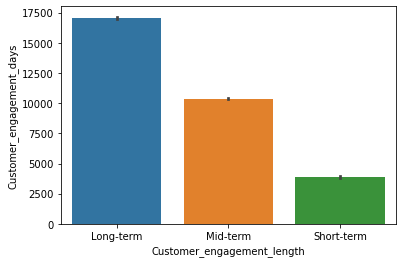

In [79]:
sb.barplot(x='Customer_engagement_length',y='Customer_engagement_days',data=dataset)
plt.show()

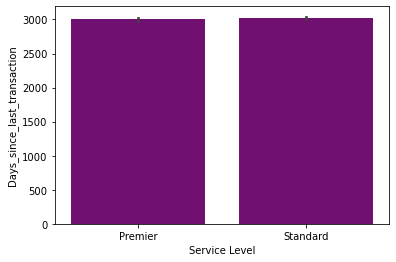

In [94]:
sb.barplot(x='Service Level',y='Days_since_last_transaction',data=dataset,color='purple')
plt.show()

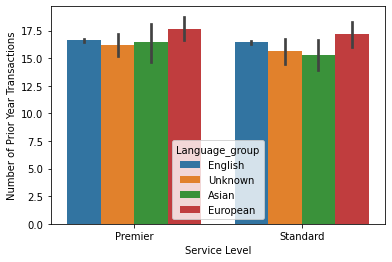

In [91]:
sb.barplot(x='Service Level',y='Number of Prior Year Transactions',hue='Language_group',data=dataset)
plt.show()

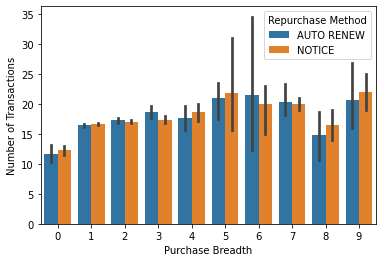

In [97]:
sb.barplot(x='Purchase Breadth',y='Number of Transactions',hue='Repurchase Method',data=dataset)
plt.show()

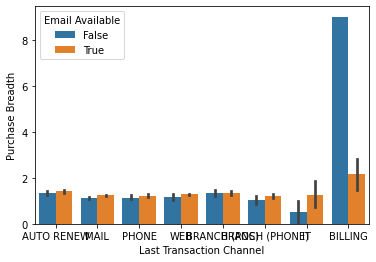

In [118]:
sb.barplot(x='Last Transaction Channel',y='Purchase Breadth',hue='Email Available',data=dataset)
plt.show()

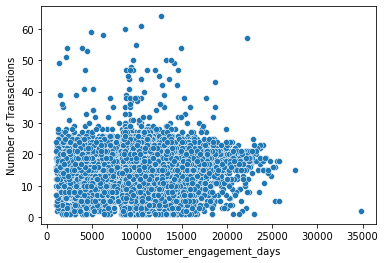

In [125]:
sb.scatterplot(x='Customer_engagement_days',y='Number of Transactions',data=dataset)
plt.show()

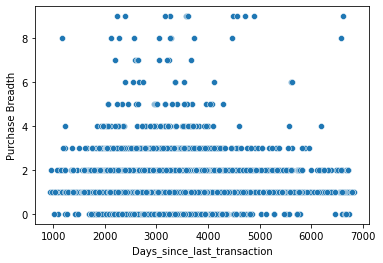

In [152]:
sb.scatterplot(x='Days_since_last_transaction',y='Purchase Breadth',data=dataset)
plt.show()

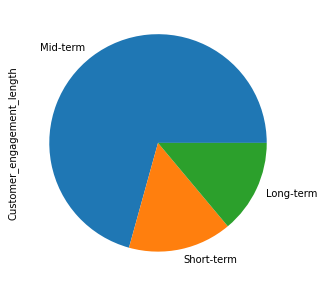

In [157]:
dataset["Customer_engagement_length"].value_counts().plot(kind='pie',figsize=(5,5))
plt.show()

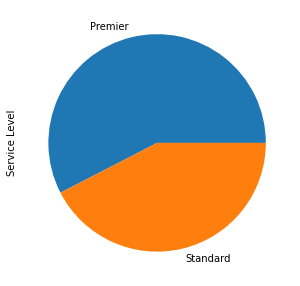

In [158]:
dataset['Service Level'].value_counts().plot(kind='pie',figsize=(5,5))
plt.show()

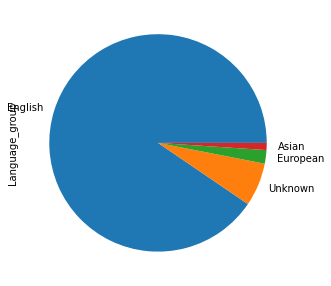

In [163]:
dataset['Language_group'].value_counts().plot(kind='pie',figsize=(5,5))
plt.show()

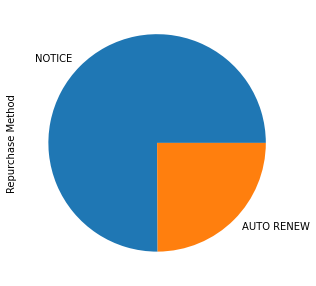

In [165]:
dataset['Repurchase Method'].value_counts().plot(kind='pie',figsize=(5,5))
plt.show()

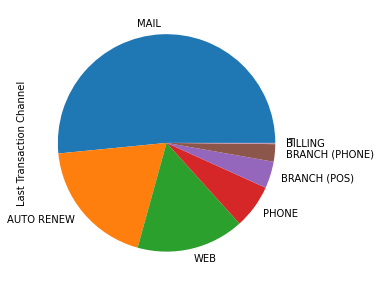

In [166]:
dataset['Last Transaction Channel'].value_counts().plot(kind='pie',figsize=(5,5))
plt.show()

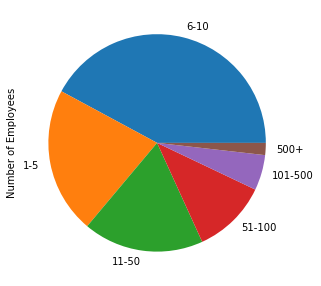

In [168]:
dataset['Number of Employees'].value_counts().plot(kind='pie',figsize=(5,5))
plt.show()